## PROJECT 1

### 1.Data Loading and Initial Inspection

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('car_price_prediction.csv')


/tmp/ipykernel_9156/2016889921.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

# Display the first few rows of the dataset
print(data.head(5))


         ID  Price Manufacturer    Model  Prod. year   Category  \
0  45654403  13328        LEXUS   RX 450        2010       Jeep   
1  44731507  16621    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467        HONDA      FIT        2006  Hatchback   
3  45769185   3607         FORD   Escape        2011       Jeep   
4  45809263  11726        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May    

In [4]:
# Check for missing values
print(data.isnull().sum())

ID                  0
Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


### 2. Data Preprocessing

In [5]:
from sklearn.preprocessing import OneHotEncoder


In [6]:
# Handle missing values if any but, there is no missing value
# data.dropna(inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Doors             19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
dtypes: int64(5),

In [8]:
# Convert 'Prod. year' to 'Car Age'
data['Car Age'] = 2024 - data['Prod. year']

In [9]:
# Encoding categorical variables
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']

In [10]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [11]:
import re

# Function to extract numeric engine volume and identify turbo engines
def process_engine_volume(engine_volume):
    match = re.match(r"(\d+(\.\d+)?)", engine_volume)
    if match:
        return float(match.group(1)), 'Turbo' in engine_volume
    else:
        return None, False

# Apply the function to the 'Engine volume' column
data['Engine volume'], data['Turbo'] = zip(*data['Engine volume'].apply(process_engine_volume))

# Convert 'Turbo' feature to integer (0 or 1)
data['Turbo'] = data['Turbo'].astype(int)

# Drop any rows where engine volume couldn't be converted
data.dropna(subset=['Engine volume'], inplace=True)


In [12]:
# Function to extract numeric mileage
def process_mileage(mileage):
    match = re.match(r"(\d+(\.\d+)?)", mileage)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the 'Mileage' column
data['Mileage'] = data['Mileage'].apply(process_mileage)

# Drop any rows where mileage couldn't be converted
data.dropna(subset=['Mileage'], inplace=True)


In [13]:
# Function to extract month from date
def extract_month(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%b').month
    except ValueError:
        return None

# Apply the function to the 'Date' column
data['Month'] = data['Doors'].apply(extract_month)

# Drop the original 'Date' column
data.drop(columns=['Doors'], inplace=True)

# Drop any rows with missing 'Month'
data.dropna(subset=['Month'], inplace=True)


In [14]:
data.info() # Every column convertes into int datatype

<class 'pandas.core.frame.DataFrame'>
Index: 19109 entries, 0 to 19236
Columns: 1701 entries, ID to Month
dtypes: bool(1691), float64(3), int64(7)
memory usage: 32.4 MB


### 3. Exploratory Data Analysis (EDA)

#### 3.1 Univariate Analysis


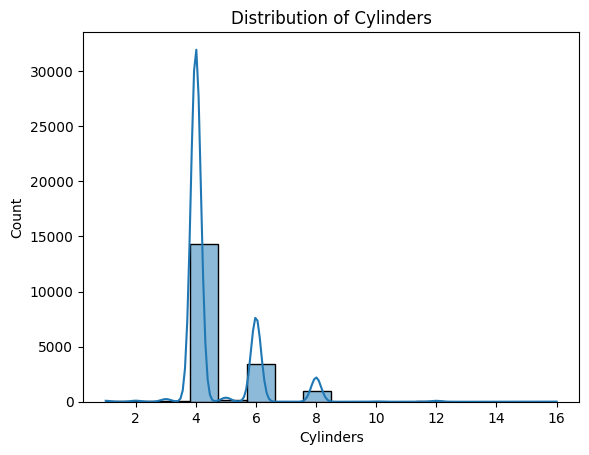

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Car Prices
sns.histplot(data['Cylinders'], kde=True)
plt.title('Distribution of Cylinders')
plt.show()


#### 3.2 Bivariate Analysis


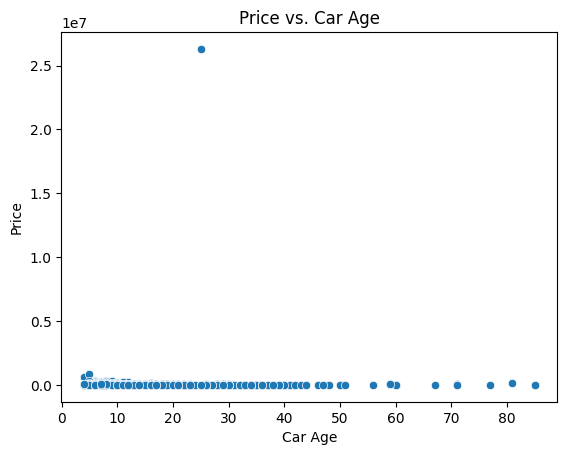

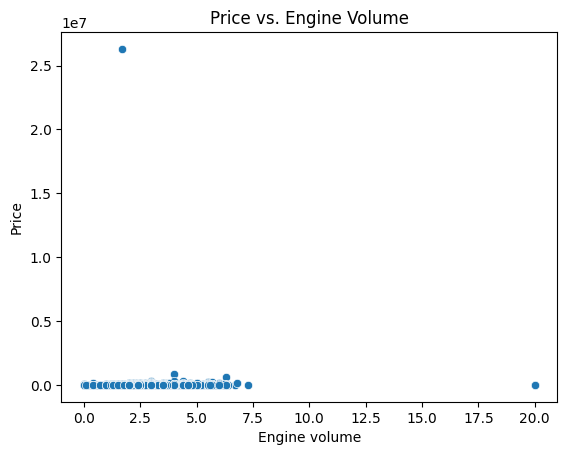

In [16]:
# Price vs. Car Age
sns.scatterplot(x='Car Age', y='Price', data=data)
plt.title('Price vs. Car Age')
plt.show()

# Price vs. Engine Volume
sns.scatterplot(x='Engine volume', y='Price', data=data)
plt.title('Price vs. Engine Volume')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = data.drop(columns=['ID', 'Price'])
y = data['Price']



In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha value for better results
ridge.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 43779154138.60797
Test MSE: 1437740381.5112476


In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
# Define parameter grid for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

In [22]:
# Initialize Ridge model
ridge = Ridge()


In [23]:
# Perform Grid Search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [24]:
# Best parameter and model
best_ridge = grid_search.best_estimator_
print(f'Best alpha: {grid_search.best_params_}')

Best alpha: {'alpha': 1000}


In [25]:
# Evaluate the tuned model
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

In [26]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Tuned Train MSE: {train_mse}')
print(f'Tuned Test MSE: {test_mse}')

Tuned Train MSE: 43791391593.05677
Tuned Test MSE: 1263515327.861187
